<a href="https://www.kaggle.com/code/samithsachidanandan/black-friday-sale-prediction-analysis-regression?scriptVersionId=234293735" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Black Friday Sales Prediction Analysis - Regression

In this notebook we are analysing the Black Friday Sales and trying to predict the Purchase amount using the features. This is regression problem. 

## Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

### Attributes:

| Column ID | Column Name                  | Data Type | Description                          | Masked |
|-----------|------------------------------|-----------|--------------------------------------|--------|
| 0         | User_ID                      | int64     | Unique Id of customer                | False  |
| 1         | Product_ID                   | object    | Unique Id of product                 | False  |
| 2         | Gender                       | object    | Sex of customer                      | False  |
| 3         | Age                          | object    | Age of customer                      | False  |
| 4         | Occupation                   | int64     | Occupation code of customer          | True   |
| 5         | City_Category                | object    | City of customer                     | True   |
| 6         | Stay_In_Current_City_Years   | object    | Number of years of stay in city      | False  |
| 7         | Marital_Status              | int64     | Marital status of customer           | False  |
| 8         | Product_Category_1           | int64     | Category of product                  | True   |
| 9         | Product_Category_2           | float64   | Category of product                  | True   |
| 10        | Product_Category_3           | float64   | Category of product                  | True   |
| 11        | Purchase                     | int64     | Purchase amount                      | False  |


## Importing the necessary Libraries 

In [75]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

import missingno as msno
plt.style.use('fivethirtyeight')

## Loading the Dataset

In [ ]:
df = pd.read_csv('/kaggle/input/black-friday-sales-prediction/train.csv')
df.head()

## Basic Statistics

In [77]:
# Statsticsl info 
df.describe().style.background_gradient(cmap = "Blues")

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1003028.842401,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1727.591586,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1000001.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1001516.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1003077.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1004478.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1006040.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [78]:
# Dtypes info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [79]:
#Null Values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [80]:
#Unique Values 
df.apply(lambda x : len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [81]:
#Shape of the Dataset
df.shape

(550068, 12)

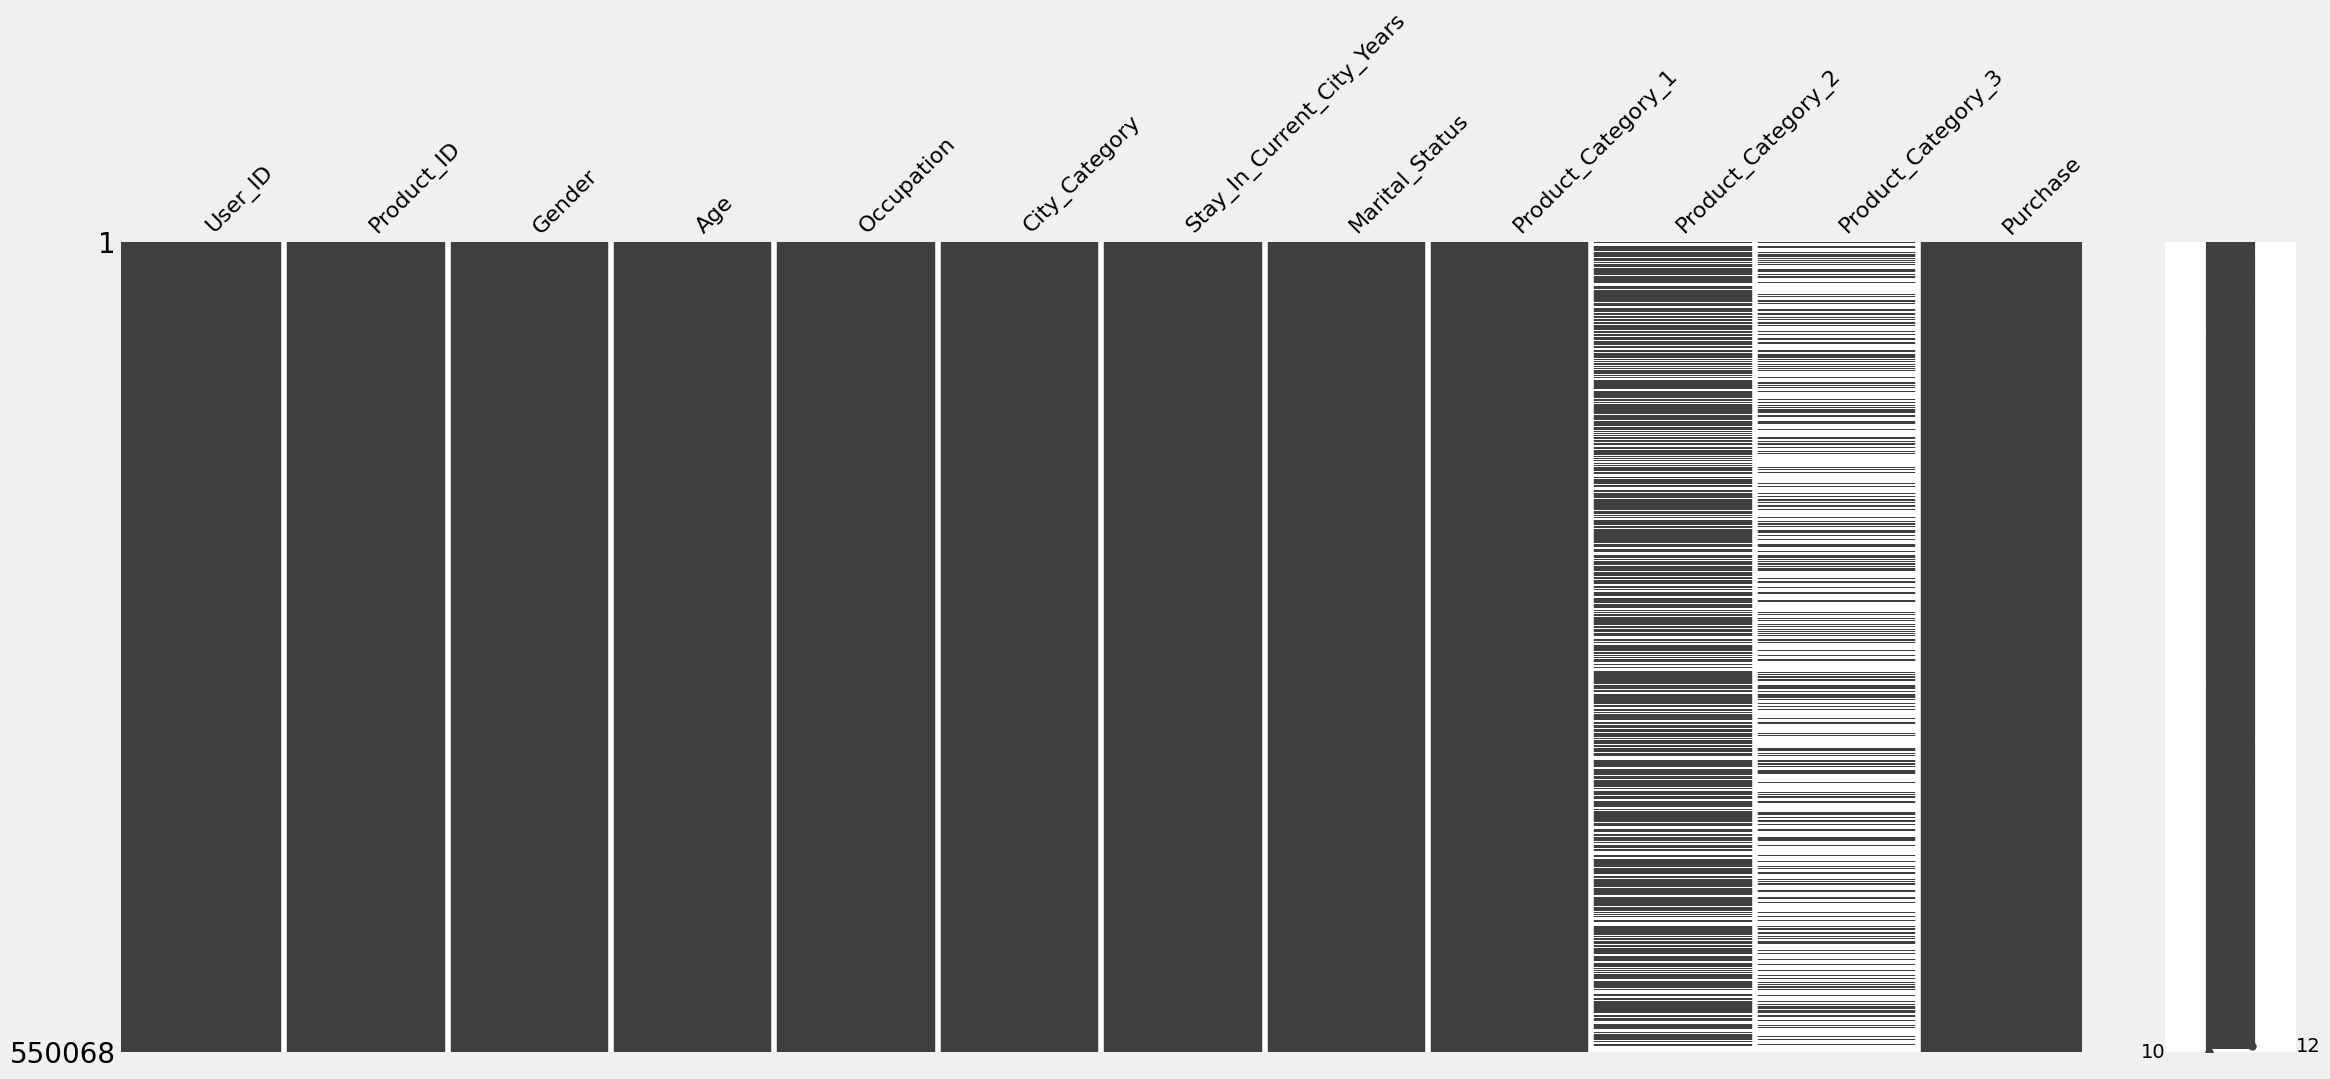

In [82]:
# Create a Matrix Plot
msno.matrix(df)
plt.show()

## Exploratory Data Analysis

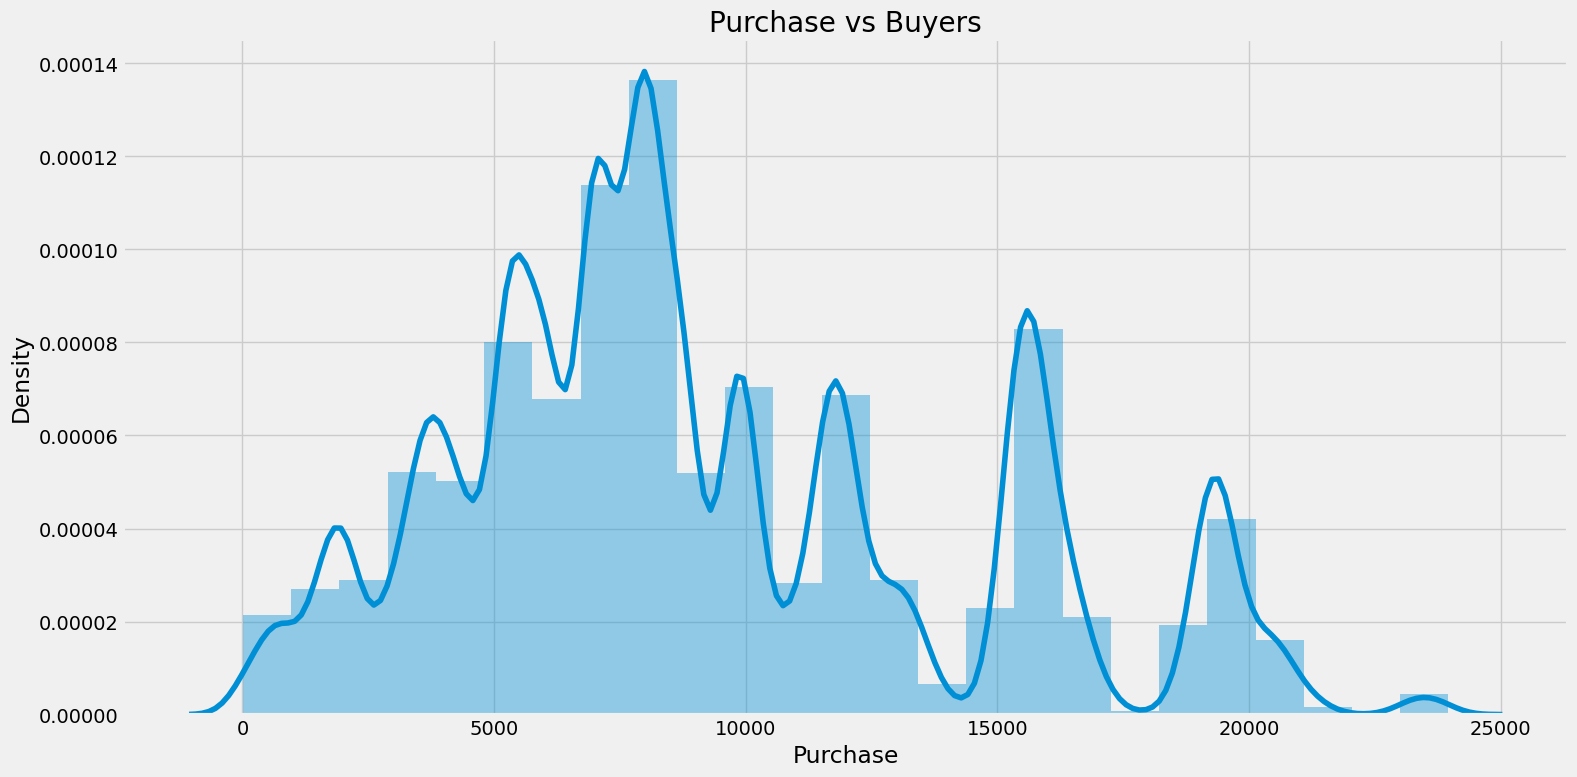

In [83]:
plt.figure(figsize = (16,8))
sns.distplot(df['Purchase'],bins = 25)
plt.title("Purchase vs Buyers")
plt.tight_layout()
plt.show()


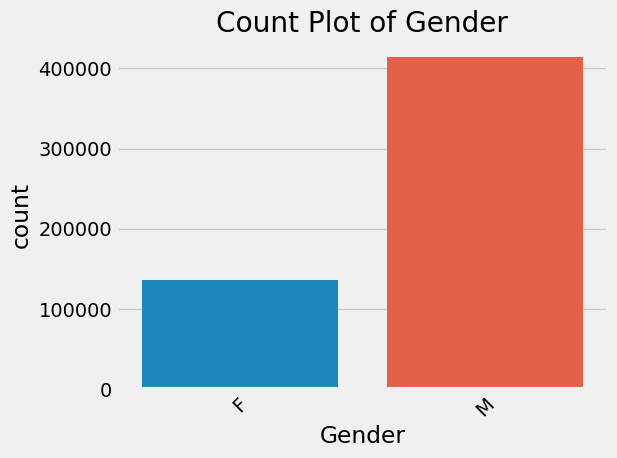

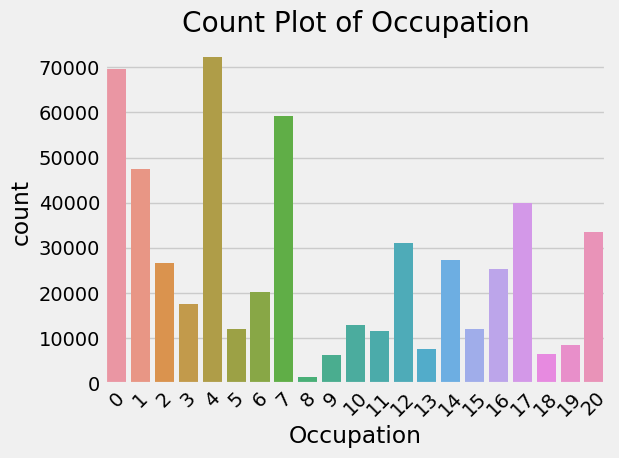

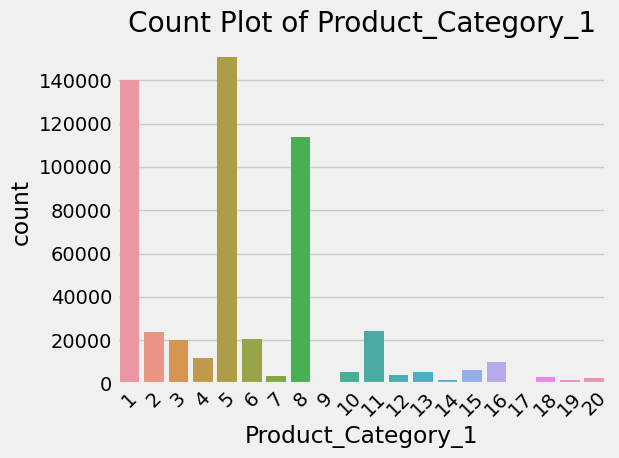

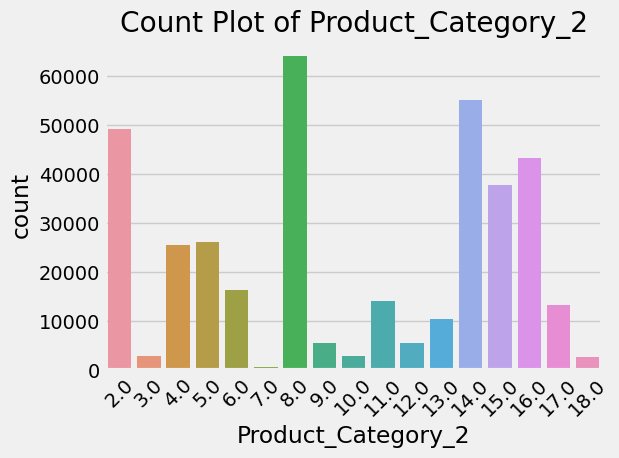

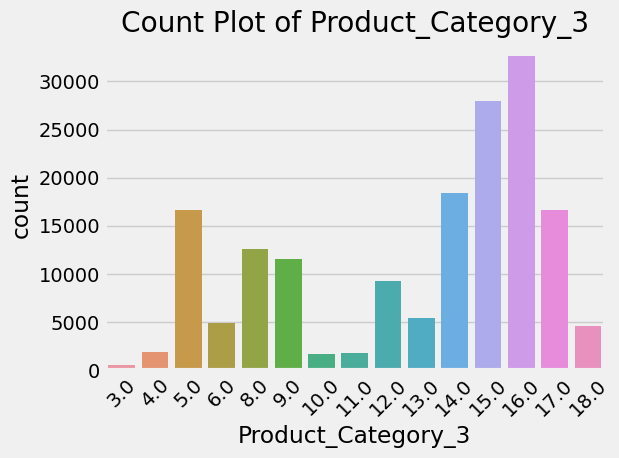

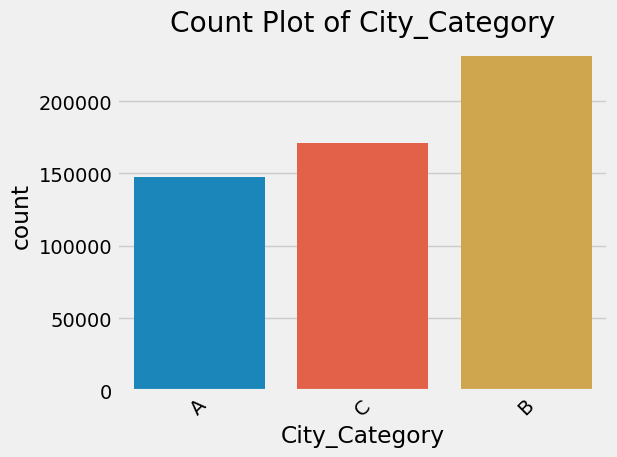

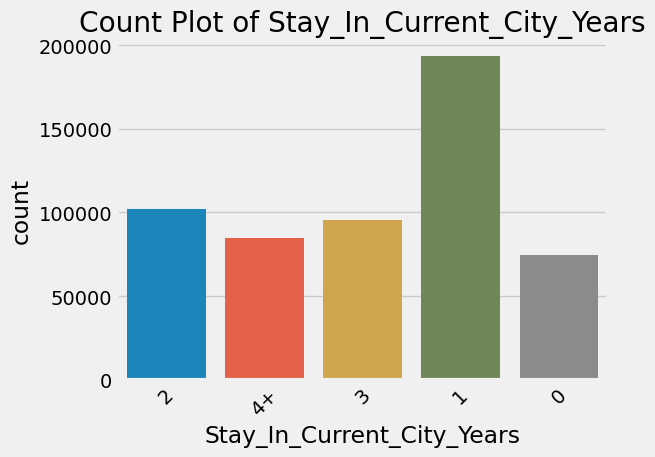

In [84]:
# Distribution of numeric values

columns = ['Gender', 'Occupation', 'Product_Category_1','Product_Category_2','Product_Category_3','City_Category','Stay_In_Current_City_Years'  ]

for col in columns:
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

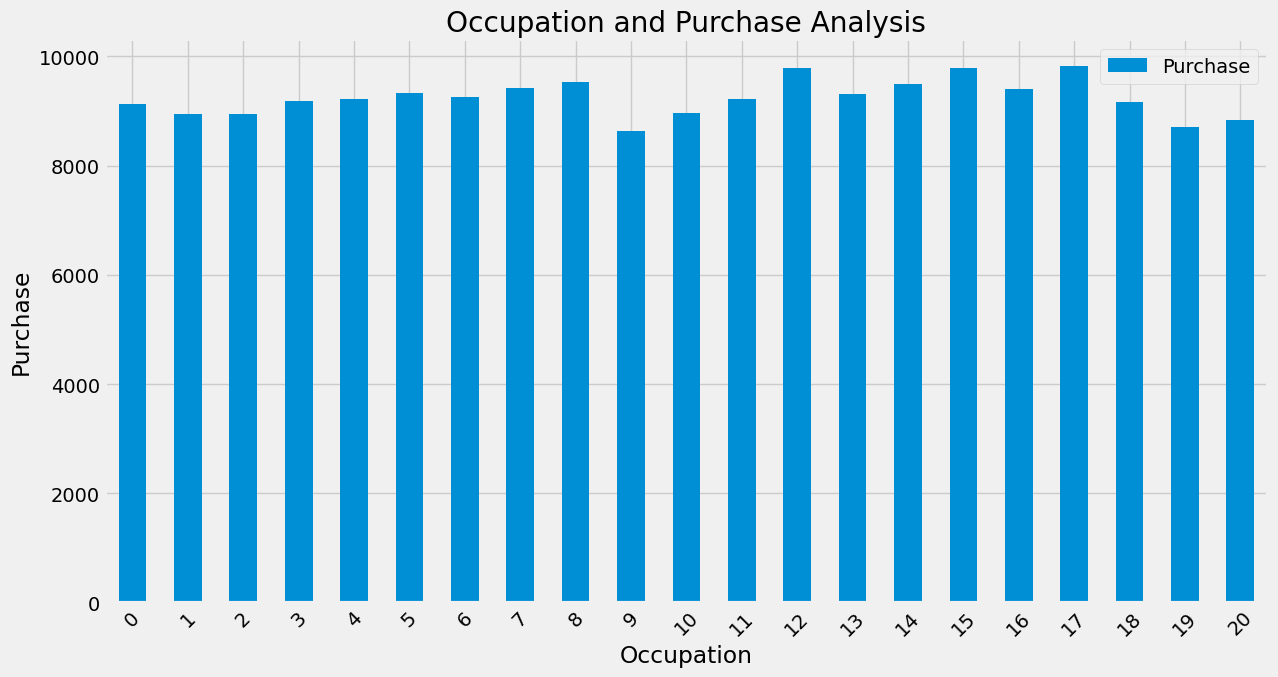

In [85]:
#bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13,7))
plt.title('Occupation and Purchase Analysis')
plt.xlabel("Occupation")
plt.ylabel ("Purchase")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


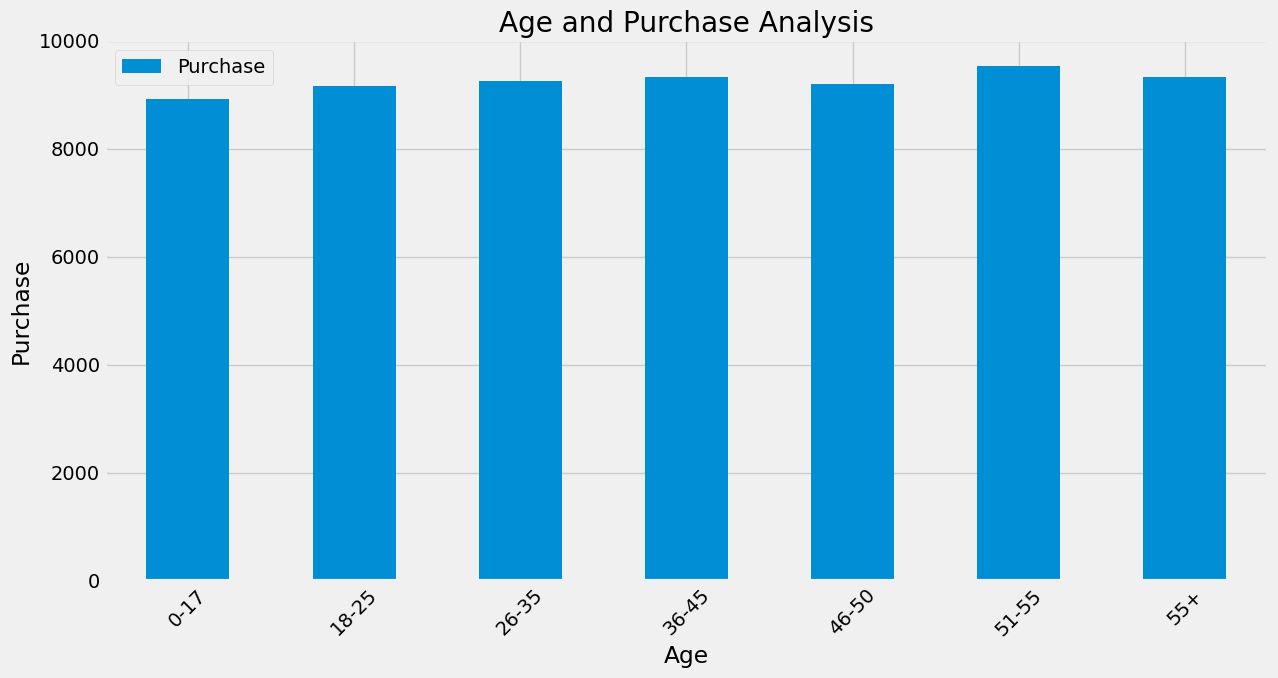

In [86]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13,7))
plt.title('Age and Purchase Analysis')
plt.xlabel("Age")
plt.ylabel ("Purchase")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


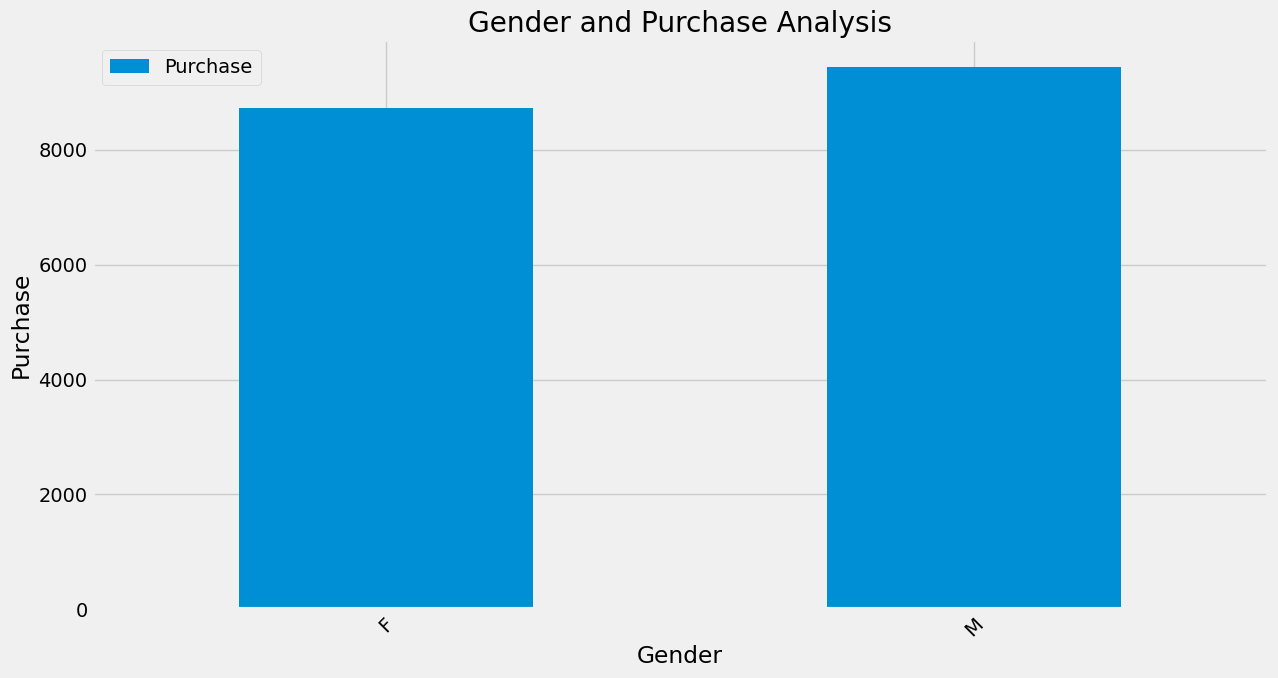

In [87]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13,7))
plt.title('Gender and Purchase Analysis')
plt.xlabel("Gender")
plt.ylabel ("Purchase")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


## Preprocessing the Dataset

In [88]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [89]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Coorelation Matrix

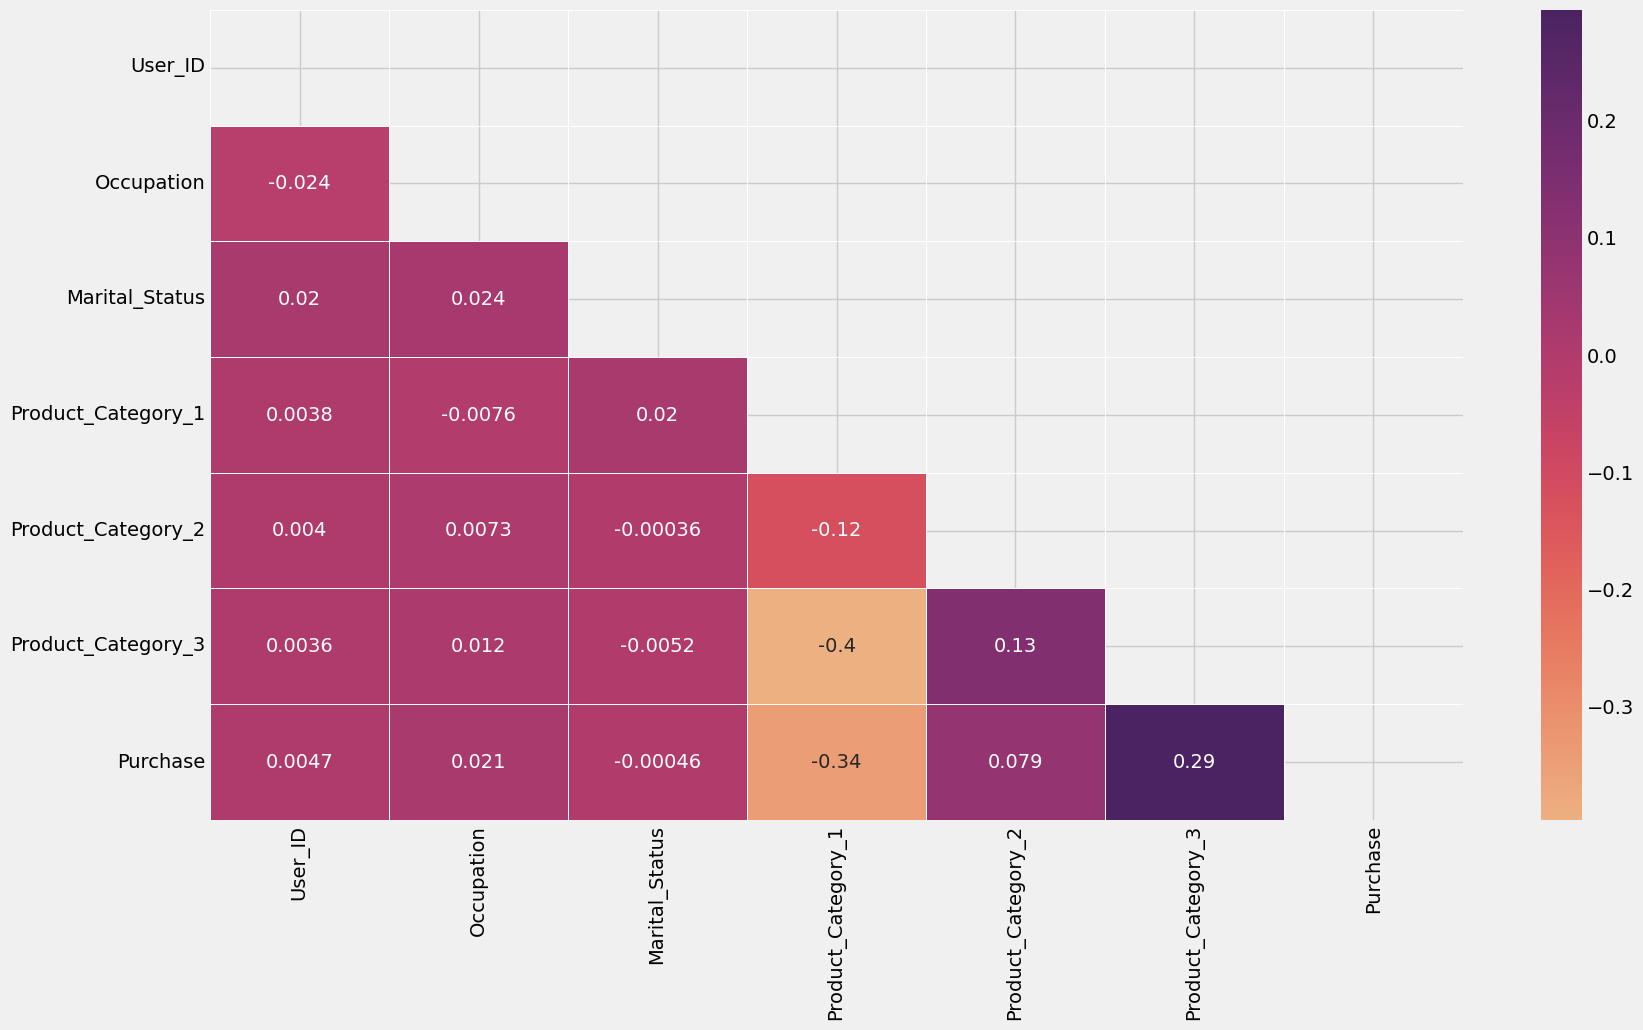

In [90]:
# correlation analysis with heatmap, after dropping the has a mobile phone with the target feature as int
corr = df.corr(numeric_only = True)
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(corr, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

##  One Hot Encodeing 

In [91]:
cols = ['Age', 'Gender', 'City_Category','Stay_In_Current_City_Years' ]

df =df.copy()

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years']))
df = pd.concat([df, encoded_df], axis=1).drop(columns=['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years'])

## Input Split

In [92]:
df.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,...,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,-2.0,-2.0,8370,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000001,P00248942,10,0,1,6.0,14.0,15200,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000001,P00087842,10,0,12,-2.0,-2.0,1422,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000001,P00085442,10,0,12,14.0,-2.0,1057,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000002,P00285442,16,0,8,-2.0,-2.0,7969,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [94]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

In [110]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    #train - test split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)
    model.fit(X_train, y_train)

    #predict the results 
    pred = model.predict(X_test)

    #Cross Validation 
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv =5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print()
    print("MSE", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score",np.sqrt(cv_score))



Results

MSE 4623.415322982604
CV Score 4623.993183772736


<Axes: title={'center': 'Model Coefficients'}>

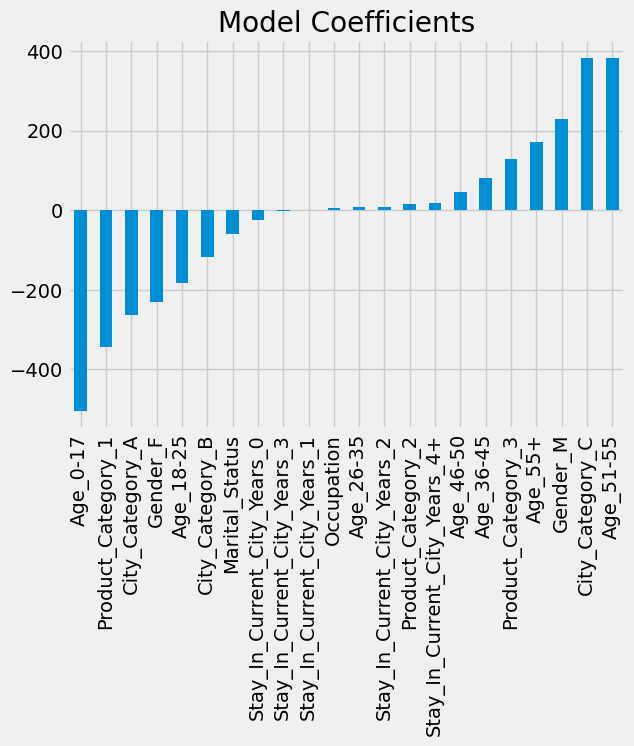

In [112]:
# LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Results

MSE 3372.711165528218
CV Score 3340.0131113421926


<Axes: title={'center': 'Feature Importance'}>

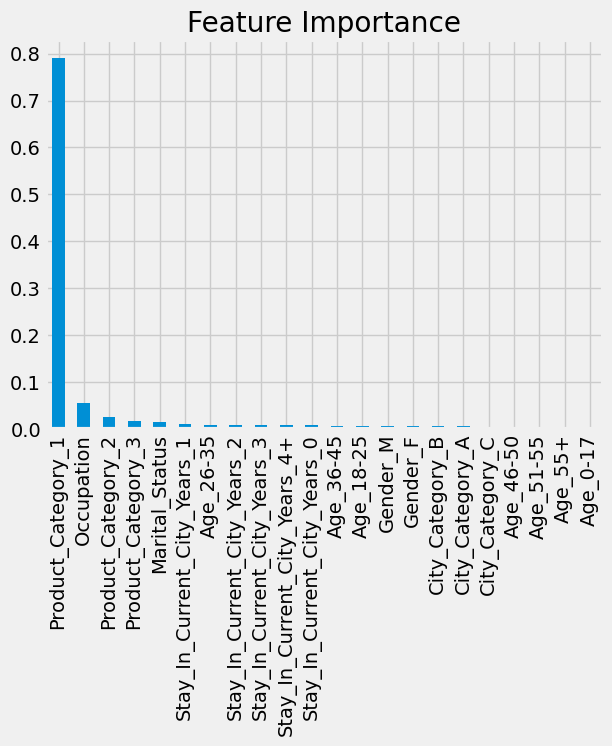

In [113]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X,y)
coef =pd.Series(model.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind='bar', title = 'Feature Importance')

Results

MSE 4623.415322982604
CV Score 4623.993183772736


<Axes: title={'center': 'Model Coefficient'}>

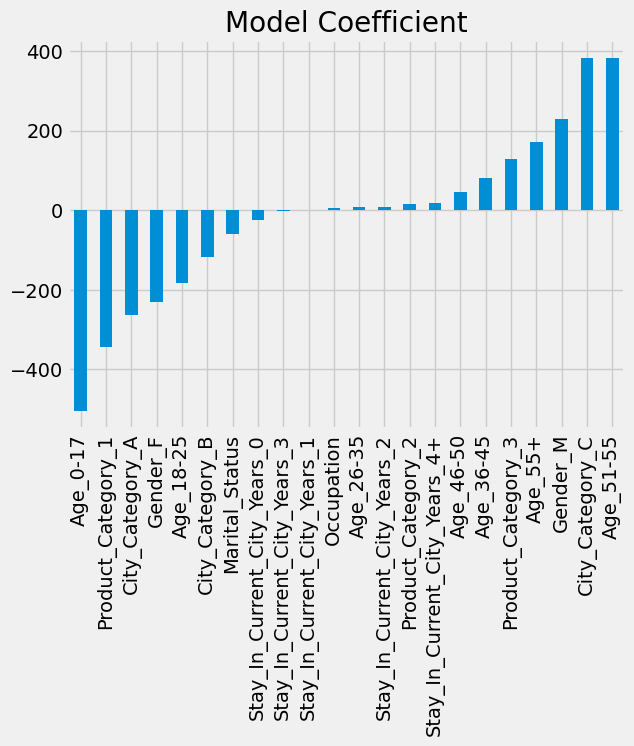

In [114]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model,X,y)
coef =pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficient')

Results

MSE 4623.415331325162
CV Score 4623.993180597143


<Axes: title={'center': 'Model Coefficient'}>

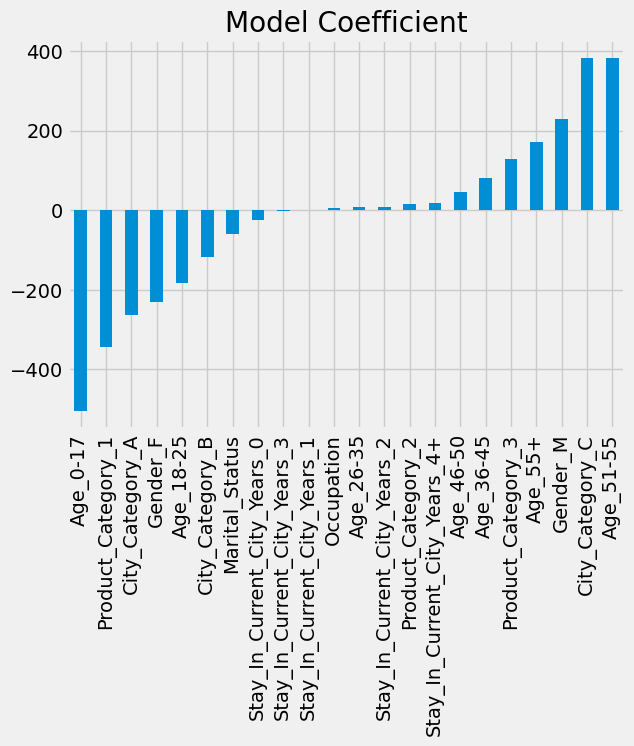

In [115]:
model = Ridge()
train(model,X,y)
coef =pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficient')

Results

MSE 4623.47289488405
CV Score 4624.003559444299


<Axes: title={'center': 'Model Coefficient'}>

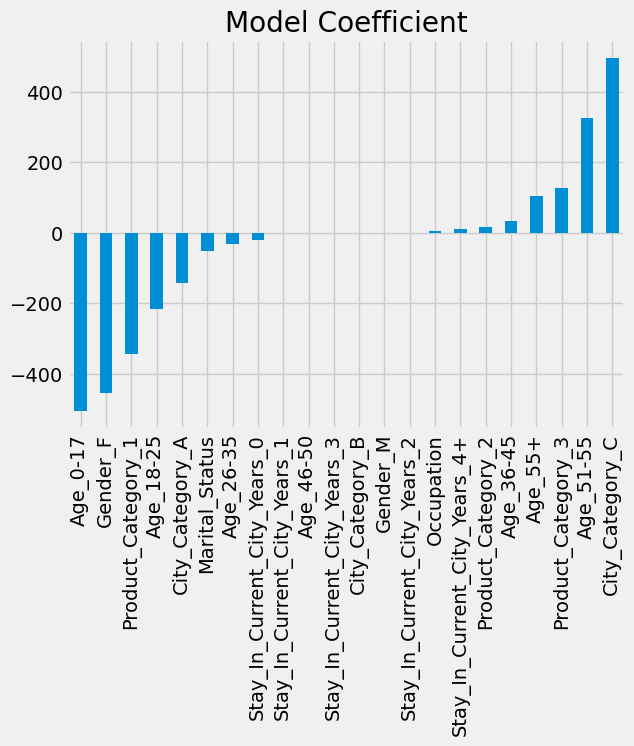

In [116]:
model = Lasso()
train(model,X,y)
coef =pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficient')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X,y)
coef =pd.Series(model.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind='bar', title = 'Feature Importance')

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,X,y)
coef =pd.Series(model.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind='bar', title = 'Feature Importance')